# Sect 41:  Deeper Neural Networks


- Study Group: 12/03/20
- online-ds-ft-081720

## Announcements

- No Feelings Fridays this week, can resume next week at 12-12:30 pm EST.

## Learning Objectives

- Review basics from last class about an individual neuron. 

- **Discuss details about deep neural networks:**
    - what makes an ANN "deep"?
    - what are the different activation functions?
    
    
- Revisit Tensorflow Playground with deeper network
- **Activity: Deep Neural Networks Lab + Bonus Task**

## Questions?

- 

### Researching Tips
> Google Tips: Add phrases like "best practices" or "for beginners"
- e.g.: "artificial neural network best practices"

> Get specific with your task:
- e.g. "text classification activation functions"

# Quick Review from Last Class

### Processing within a Neuron


<img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-02-introduction-to-neural-networks-online-ds-ft-021119/master/figures/log_reg.png">

- **Activation functions** control the output of a neuron.($\hat y =f_{activation}(x)$ )
    - Most basic activation function is sigmoid functin ($\hat y =\sigma(x)$)
    - Choice of activation function controls the size/range of the output.
- **Linear transformations** ( $z = w^T x + b$ ) are used control the output of the activation function .
    - where $w^T $ is the weight(/coefficient), $x$ is the input, and  $b$ is a bias. 
        - weights: 
        - bias:
        

### How Neurons Learn

- **Loss functions** ($\mathcal{L}(\hat y, y) $)  measure inconsistency between predicted ($\hat y$) and actual $y$
    - will be optimized using gradient descent
    - defined over 1 traning sample
- **Cost functions** takes the average loss over all of the samples.
    - $J(w,b) = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})$
    - where $l$ is the number of samples

> #### How weights and biases are updated
- **Forward propagation** is the calculating  loss and cost functions.
- **Back propagation** involves using gradient descent to update the values for  $w$ and $b$.
    - $w := w- \alpha\displaystyle \frac{dJ(w)}{dw}$ <br><br>
    - $b := b- \alpha\displaystyle \frac{dJ(b)}{db}$
        - where $ \displaystyle \frac{dJ(w)}{dw}$ and $\displaystyle \frac{dJ(b)}{db}$ represent the *slope* of the function $J$ with respect to $w$ and $b$ respectively
        - $\alpha$ denote the *learning rate*. 
 

### Summary of Process
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/neural_network_steps.png" width=90%>

## Activation Functions
- https://dashee87.github.io/deep%20learning/visualising-activation-functions-in-neural-networks/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from functions import *

- **sigmoid:**<br>
<!-- <img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-04-deeper-neural-networks-online-ds-ft-021119/master/index_files/index_33_1.png" width=200> -->
    - $ f_a=\dfrac{1}{1+ \exp(-z)}$
    - outputs 0 to +1
    

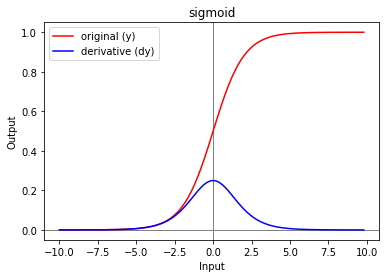

In [2]:
plot_activation(sigmoid)

- **tanh (hyperbolic tan):**<br>
    - $f_a = =\dfrac{\exp(z)- \exp(-z)}{\exp(z)+ \exp(-z)}$
    - outputs -1 to +1
    - Generally works well in intermediate layers
    - one of most popular functions
    

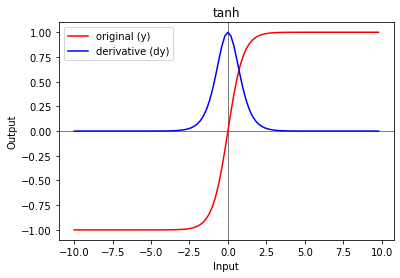

In [3]:
plot_activation(tanh)

- **arctan**
    -  similar qualities as tanh, but slope is more gentle than tanh
    - outputs ~ 1.6 to 1.6
    

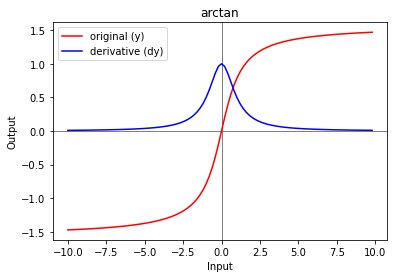

In [4]:
plot_activation(arctan)

-  **Rectified Linear Unit (relu):**<br>
    - most popular activation function
    - Activation is exactly 0 when Z <0
    - Makes taking directives slightly cumbersome
    - $f_a=\max(0,z)$
    

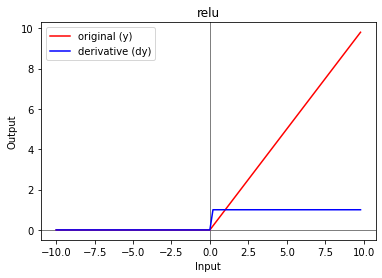

In [5]:
plot_activation(relu)

- **leaky_relu:**
    -  altered version of relu where the activatiom is slightly negative when $z<0$
    - $f_a=\max(0.001*z,z)$

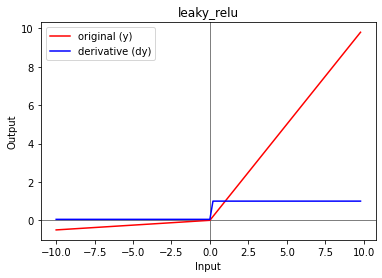

In [6]:
plot_activation(leaky_relu)

# Sect 41:  Deeper Neural Networks


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-image-classification-with-mlps-online-ds-ft-100719/master/images/Deeper_network.jpg">

## Why deeper networks?

- **Advantages:**
    - largely eliminates need for feature engineering
    - multiple levels of information processing in one networking.
        - Ex: for images:
            - First layer detects edges
            - second layer gorups edges and detects patterns
            - more layers group even bigger parts together
        - Ex: for audio:
            - first layer: low level wave features
            - second: basic units of sounds ("phonemes")
            - third: word recognition
            - fourth: sentence recognition
    

## How many layers/units?

- **Two schools of thought on how how many layers:**
    - Start with a single layer with few neurons
        - Add additional, add additional
    - Start with a fully fleshed out network that we then prune until we see a dropoff in in performance (then restore the last changes)

### Other Resources

- [Visualization of a Convolutional Neural Network - maybe?](https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html)

- [Blog post: How many Hidden Layers?](https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e)

## Demo: Revisit Tensorflow Playground Spiral 

- [Tensorflow Playground - Spiral Task](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.58541&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
    - ~~[Potenial Solution](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,5,5,2&seed=0.58541&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)~~
    

## Math Notation for Deeper Networks:


> ***Note: we will only walk through this in detail if the class has questions.***
 

- Networks are comprised of sequential layers of neurons/nodes.
    - \# of layers = hidden+output layer
        - The input layer is not counted as formal layer.
    - All layers except the final are _hidden layers_.
    
    <img src="https://raw.githubusercontent.com/jirvingphd/dsc-04-40-04-deeper-neural-networks-online-ds-ft-021119/master/figures/small_deeper.png">
    


**The output of a layer $j$ is denoted as $a^{[j]}$.**

**For our 2-layer neural network above, this means that:**

- $x = a^{[0]}$  as x is what comes out of the input layer
- $a^{[1]} = \begin{bmatrix} a^{[1]}_1  \\ a^{[1]}_2 \\ a^{[1]}_3  \\\end{bmatrix}$ is the value generated by the hidden layer
- $\hat y =  a^{[2]}$, the output layer will generate a value $a^{[2]}$, which is equal to $\hat y$.



<br>For the **first node** in the hidden layer:
- The linear transformation that occurs is:  $ z^{[1]}_1 = w^{[1]}_1 x +b^{[1]}_1$,
    - Where $w$ = the weight, and $b$ = bias

- For **all nodes** in the hidden layer:
    - $ z^{[1]}_1 = w^{[1]}_1 x +b^{[1]}_1$ and  $a^{[1]}_1= f(z^{[1]}_1)$

    - $ z^{[1]}_2 = w^{[1]}_2 x +b^{[1]}_2$ and $a^{[1]}_2= f(z^{[1]}_2)$

    - $ z^{[1]}_3 = w^{[1]}_3 x +b^{[1]}_3$ and $a^{[1]}_3= f(z^{[1]}_3)$

The **dimensions** of the elements:

- $w^{[1]} = \begin{bmatrix} w^{[1]}_{1,1}  & w^{[1]}_{2,1} & w^{[1]}_{3,1}  \\ w^{[1]}_{1,2}  & w^{[1]}_{2,2} & w^{[1]}_{3,2}\end{bmatrix}$
    - where, eg. $w^{[1]}_{1,2}$ denotes the weight of the arrow going **from $x_2$ into the first node** of the hidden layer. 


- When multiplying the transpose of this matrix (making it a 2 x 3 matrix) 
    - $w^{[1]T}_1$ with $x = \begin{bmatrix} x_1  \\x_2\end{bmatrix}$ and add $b^{[1]} = \begin{bmatrix} b^{[1]}_1  \\b^{[1]}_2 \\ b^{[1]}_3 \end{bmatrix}$,
    - we obtain $z^{[1]} = \begin{bmatrix} z^{[1]}_1  \\z^{[1]}_2 \\ z^{[1]}_3 \end{bmatrix}$.

----

- The activation function is   $a^{[1]}_1= f(z^{[1]}_1)$.
$w^{[1]}_{1,2}$

$w^{[1]} = \begin{bmatrix} w^{[1]}_{1,1}  & w^{[1]}_{2,1} & w^{[1]}_{3,1}  \\ w^{[1]}_{1,2}  & w^{[1]}_{2,2} & w^{[1]}_{3,2}\end{bmatrix}$ 

[Reminder: $x = \begin{bmatrix} x_1  \\x_2\end{bmatrix} \equiv a^{[0]}$ and that $a^{[2]} = \hat y$ ]

- Then, given input $x$:

    - $z^{[1]} = w^{[1]T} a^{[0]} + b^{[1]}$

    - $a^{[1]} = f(z^{[1]})$

    - $z^{[2]} = w^{[2]T} a^{[1]} + b^{[2]}$

    - $a^{[2]} = f(z^{[1]})$
    
    
- When adding in several training samples ($i$), these become:
    - $z^{[1](i)} = w^{[1]T} a^{[0](i)} + b^{[0]}$

    - $a^{[1](i)} = f(z^{[1](i)})$

    - $z^{[2](i)} = w^{[2]T} a^{[1](i)} + b^{[2]}$

    - $a^{[2](i)} = f(z^{[1](i)})$
    
<!---    
### Process Summary
- We begin by defining a model architecture which includes the number of hidden layers, activation functions (sigmoid or relu) and the number of units in each of these.  
- We then initialize parameters for each of these layers (typically randomly). After the initial parameters are set, forward propagation evaluates the model giving a prediction, which is then used to evaluate a cost function. Forward propogation involves evaluating each layer and then piping this output into the next layer. 
- Each layer consists of a linear transformation and an activation function.  The parameters for the linear transformation in **each** layer include $W^l$ and $b^l$. The output of this linear transformation is represented by $Z^l$. This is then fed through the activation function (again, for each layer) giving us an output $A^l$ which is the input for the next layer of the model.  
- After forward propogation is completed and the cost function is evaluated, backpropogation is used to calculate gradients of the initial parameters with respect to this cost function. Finally, these gradients are then used in an optimization algorithm, such as gradient descent, to make small adjustments to the parameters and the entire process of forward propogation, back propogation and parameter adjustments is repeated until the modeller is satisfied with the results.--->

# Basics of Building a Neural Network with Keras:


**Basics of Building a Neural Network with Keras:**
1. **Import required modules**
    - **For general neural network**
        - `from keras import models, layers,optimizers`
    - **For text:**
        - `from keras.preprocessing.text import Tokenizer`
        - `from keras.utils import to_categorical`
    - **For images:**
        - `from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img`
    - **For relocating image files:**
        - `import os, shutil`

2. **Decide on a network architecture (have only discussed sequential thus far)**
    - `model = models.Sequential()`

3. **Adding layers - specifying layer type, number of neurons, activation functions, and, optionally, the input shape.**
    - `model.add(layers.Dense(units, activation='relu', input_shape))`
    - `model.add(layers.Dense(units, activation='relu',input_shape))`

>- **3B. Final layer choice:**
    - Want to have as many neurons as classes you are trying to predict
    -  Final activation function:
        - For binary classificaiton, use `activation='sigmoid'`
        - For multi classificaiton, use `activation='softmax'`
    - For regression tasks, have a single final neuron.

> 4. **Compile the model:**
    - Specify optimiziers
        - `RMSprop`, `SGD`,`"adam"`
    - specify loss functions
        - for binary classification: `'binary_crossentropy'`
        - for multi classification: `'categorical_crossentropy'`
    - specify metrics
        -usually 'acc'
    
    

5. **Training the model**
    - `model.fit(X_train, y_train, epochs=20,batch_size=512,validation_data=(x_val,y_val))`
        - Note: if using images with ImageDataGenerator, use `model.fit_generator()`
    
    - **batches:**
        - a set of N samples, processed independently in parallel
        - a batch determines how many samples are fed through before back-propagation. 
        - model only updates after a batch is complete.
        - ***ideally have as large of a batch as your hardware can handle without going out of memory.***
            - larger batches usually run faster than smaller ones for evaluation/prediction. 
    - **epoch:**
        - arbitrary cutoff / "one pass over the entire dataset", useful for logging and periodic evaluation
        - when using kera's `model.fit` parameters `validation_data` or `validation_split`, these evaluations run at the end of every epoch.
        - Within Keras can add callbacksto be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).
        

6. **Evaluation / Predictions**
    - To get predicted results:
        - `y_hat_test = model.predict(test)`
    - To get evaluation metrics:
        - `results_test = model.evaluate(test, label_test)`
        

7. **Visualization**
    - **`history =  model.fit()` creates history object with .history attribute.**
        - `history.history()` returns a dictionary of metrics from each epoch. 
            - `history.history['loss']` and `history.history['acc']` 
 

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-image-classification-with-mlps-online-ds-ft-100719/master/images/Deeper_network.jpg">

# Activity: Deeper Neural Networks Lab

> **Bonus Assignment for us: Add a final model where we use MinMaxScaler instead of StandardScaler and look for convergence.**

In [1]:
pwd

'/Users/jamesirving/Documents/GitHub/_COHORT_NOTES/081720FT/aug-ds-ft-2020-notebooks/topic41-deep-neural-networks'